In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('Employee_trans.csv', index_col=0)
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


In [3]:
# X Set without label
# y Set with label
X= df.drop(['LeaveOrNot'], axis=1)
y = df['LeaveOrNot']

In [4]:
X

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,2017,0,3,34,1,0,0
1,0,2013,2,1,28,0,0,3
2,0,2014,1,3,38,0,0,2
3,1,2016,0,3,27,1,0,5
4,1,2017,2,3,24,1,1,2
...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4
4649,1,2013,2,2,37,1,0,2
4650,1,2018,1,3,27,1,0,5
4651,0,2012,0,3,30,1,1,2


In [5]:
y

0       0
1       1
2       0
3       1
4       1
       ..
4648    0
4649    1
4650    1
4651    0
4652    0
Name: LeaveOrNot, Length: 4653, dtype: int64

# Training and Test Data

In [6]:
#Split Validation 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
X_train.shape, X_test.shape

((3117, 8), (1536, 8))

In [7]:
X_train.dtypes

Education                    int64
JoiningYear                  int64
City                         int64
PaymentTier                  int64
Age                          int64
Gender                       int64
EverBenched                  int64
ExperienceInCurrentDomain    int64
dtype: object

In [8]:
X_test.dtypes

Education                    int64
JoiningYear                  int64
City                         int64
PaymentTier                  int64
Age                          int64
Gender                       int64
EverBenched                  int64
ExperienceInCurrentDomain    int64
dtype: object

In [9]:
#RobustScaler = Scaler removes the median and scales the data according to the quantile range 
#The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile)

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
cols = X_train.columns

X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [10]:
# we can see scaled content (RobustScaler)
X_train

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0.0,0.50,0.5,0.0,0.000000,0.0,0.0,-1.0
1,0.0,0.50,0.0,-1.0,1.285714,-1.0,0.0,1.0
2,0.0,0.00,-0.5,0.0,1.142857,0.0,0.0,1.0
3,1.0,0.50,0.0,-1.0,-0.571429,-1.0,0.0,-0.5
4,1.0,-0.75,0.0,0.0,0.000000,0.0,0.0,-0.5
...,...,...,...,...,...,...,...,...
3112,0.0,0.25,-0.5,0.0,0.000000,0.0,0.0,0.0
3113,1.0,0.25,0.0,0.0,0.714286,-1.0,0.0,-1.0
3114,0.0,0.50,0.0,0.0,-0.285714,-1.0,0.0,0.5
3115,0.0,0.75,0.5,0.0,-0.142857,0.0,0.0,1.0


In [11]:
X_test

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0.0,-0.25,-0.5,0.0,-0.428571,0.0,0.0,0.0
1,0.0,0.00,0.5,-1.0,0.000000,-1.0,0.0,0.0
2,0.0,0.25,-0.5,0.0,-0.428571,-1.0,0.0,0.0
3,0.0,0.25,0.0,0.0,-0.285714,-1.0,0.0,0.5
4,0.0,-0.75,-0.5,0.0,0.428571,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1531,0.0,-0.75,-0.5,0.0,-0.142857,0.0,0.0,1.0
1532,0.0,0.00,0.5,0.0,-0.285714,0.0,0.0,0.5
1533,0.0,0.00,-0.5,0.0,-0.285714,-1.0,0.0,0.5
1534,0.0,-0.25,-0.5,-2.0,0.857143,-1.0,0.0,1.0


# Modeling the NB

In [12]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [13]:
#see predictions, either leave or not leave (based on test-data)
y_pred = gnb.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [14]:
#check accuracy via predicted labels
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.6914


In [15]:
#see predictions, either leave or not leave (based on training-data)
y_pred_train = gnb.predict(X_train)
y_pred_train

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [16]:
#compare the accuracy score between training and test-set
#no sign for overfitting
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.6987
Test set score: 0.6914


In [17]:
#ConfusionMatrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[823 192]
 [282 239]]

True Positives(TP) =  823

True Negatives(TN) =  239

False Positives(FP) =  192

False Negatives(FN) =  282


<AxesSubplot:>

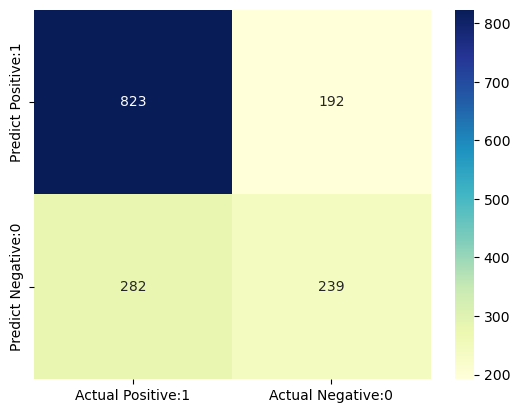

In [18]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

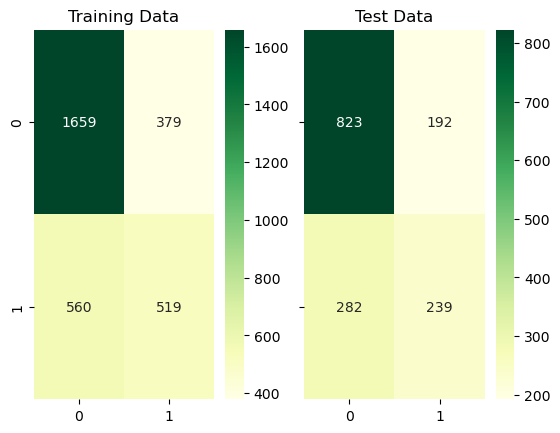

In [19]:
#Comparison of confusion matrices of training and testing set

from sklearn import metrics
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_pred_train)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_pred)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][1]);
a[0][1].set_title('Test Data');

In [20]:
#Classification Metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.78      1015
           1       0.55      0.46      0.50       521

    accuracy                           0.69      1536
   macro avg       0.65      0.63      0.64      1536
weighted avg       0.68      0.69      0.68      1536



In [21]:
#Predict Probabilities of assigning object either to 0 (not leave) or to 1 (leave)
#There is a classification threshold level of 0.5

y_pred_prob = gnb.predict_proba(X_test)
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Probability of Not Leaving', 
                                                         'Probability of Leaving'])

y_pred_prob_df

,Probability of Not Leaving,Probability of Leaving
0,0.912709,0.087291
1,0.298034,0.701966
2,0.710168,0.289832
3,0.629339,0.370661
4,0.829373,0.170627
...,...,...
1531,0.933080,0.066920
1532,0.746227,0.253773
1533,0.767423,0.232577
1534,0.285047,0.714953


In [22]:
# store the predicted probabilities for class 1 - Probability of Leaving the Company

y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

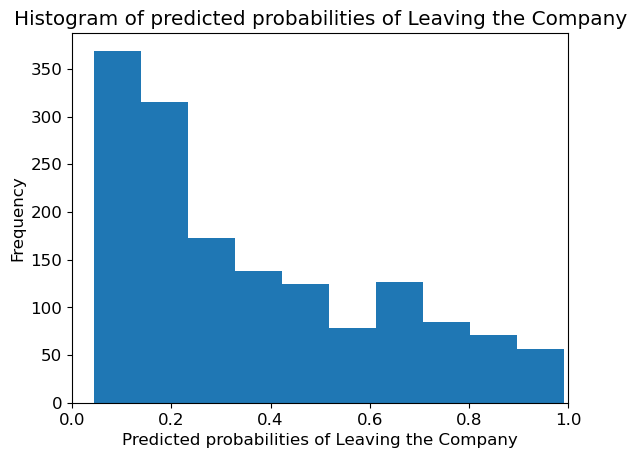

In [23]:
# plot histogram of predicted probabilities
# we see from the resulting histogram that the frequency is higher for cases where the probability of 
#... predicting the leave of the company was not so easy (left part of histogram)

# adjust the font size 
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Leaving the Company')

# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of Leaving the Company')
plt.ylabel('Frequency')

In [24]:
# store the predicted probabilities for class 0 - Probability of Not Leaving the Company

y_pred0 = gnb.predict_proba(X_test)[:, 0]

Text(0, 0.5, 'Frequency')

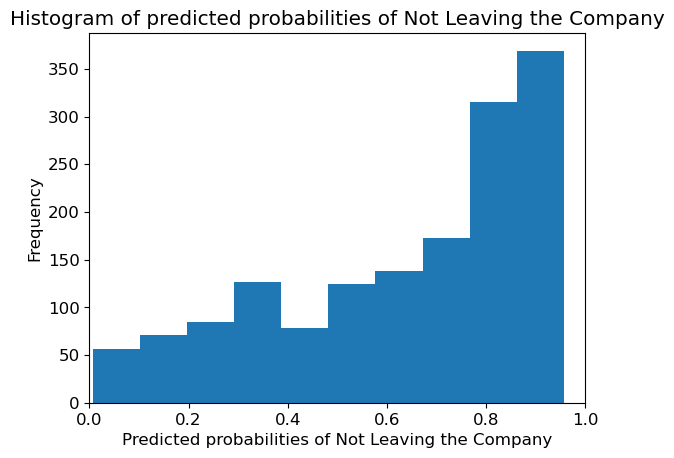

In [25]:
# now we can see for the histogram of the class 0 (NotLeaving) that it was easier for the NB to predict
# ... this class (see right side of the histogram)

# adjust the font size 
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred0, bins = 10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Not Leaving the Company')

# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of Not Leaving the Company')
plt.ylabel('Frequency')

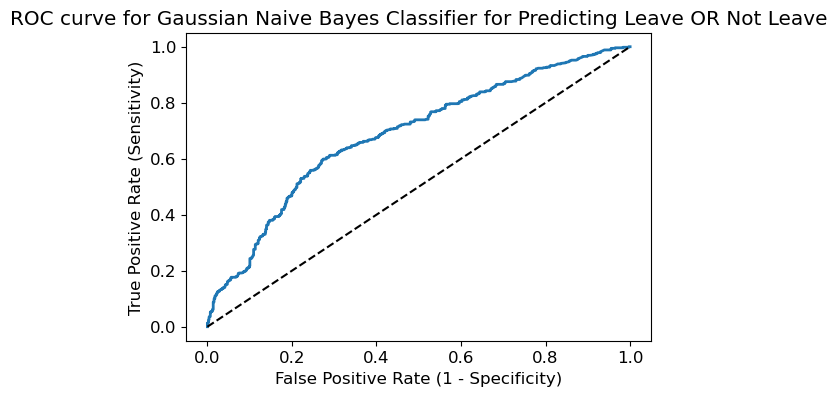

In [26]:
#ROC-AUC which always focuses true-positives

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Leave OR Not Leave')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [27]:
# calculate ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.6869


# Cross-Validation

In [28]:
#try to optimise the ROC via k-fold cross-validation
# result a bit better

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.7007


In [29]:
#Application of 10-fold cross-validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.66987179 0.72115385 0.75961538 0.63141026 0.66987179 0.74358974
 0.66987179 0.69131833 0.69453376 0.68488746]


In [30]:
#Mean of cv from previous line
#no significant increase in accuracy performance
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.6936


# Hyperparameter Tuning

In [31]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10,  random_state=999)

In [32]:
#Application of GridSearch
# Power transforms are a family of parametric, ...
# ... monotonic transformations that are applied to make data more Gaussian-like.

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=gnb, 
                     param_grid=params_NB, 
                     cv=cv,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test);


Fitting 100 folds for each of 100 candidates, totalling 10000 fits


In [33]:
gs_NB.best_params_

{'var_smoothing': 0.3511191734215131}

In [34]:
# no significant increase in accuracy despite cv-based hyperparameter tuning
gs_NB.best_score_

0.6978461081402259

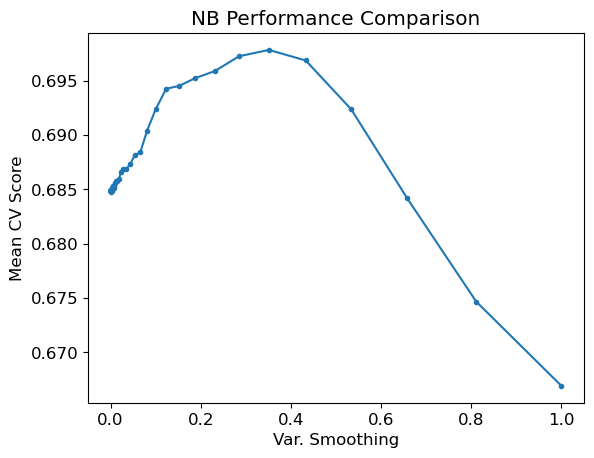

In [35]:
# graphically visualize the optimisation parameters var_smoothing
# we that the curve is maximised at the point 0.351 as proposed above

results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()